In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [62]:
df_analisis = pd.read_excel("df_procesado.xlsx")
df_analisis_sinind = df_analisis.drop(["Código NIF"],axis = 1)

In [12]:
corr_pearson = df_analisis_sinind.corr(method="pearson")
corr_spearman = df_analisis_sinind.corr(method="spearman")

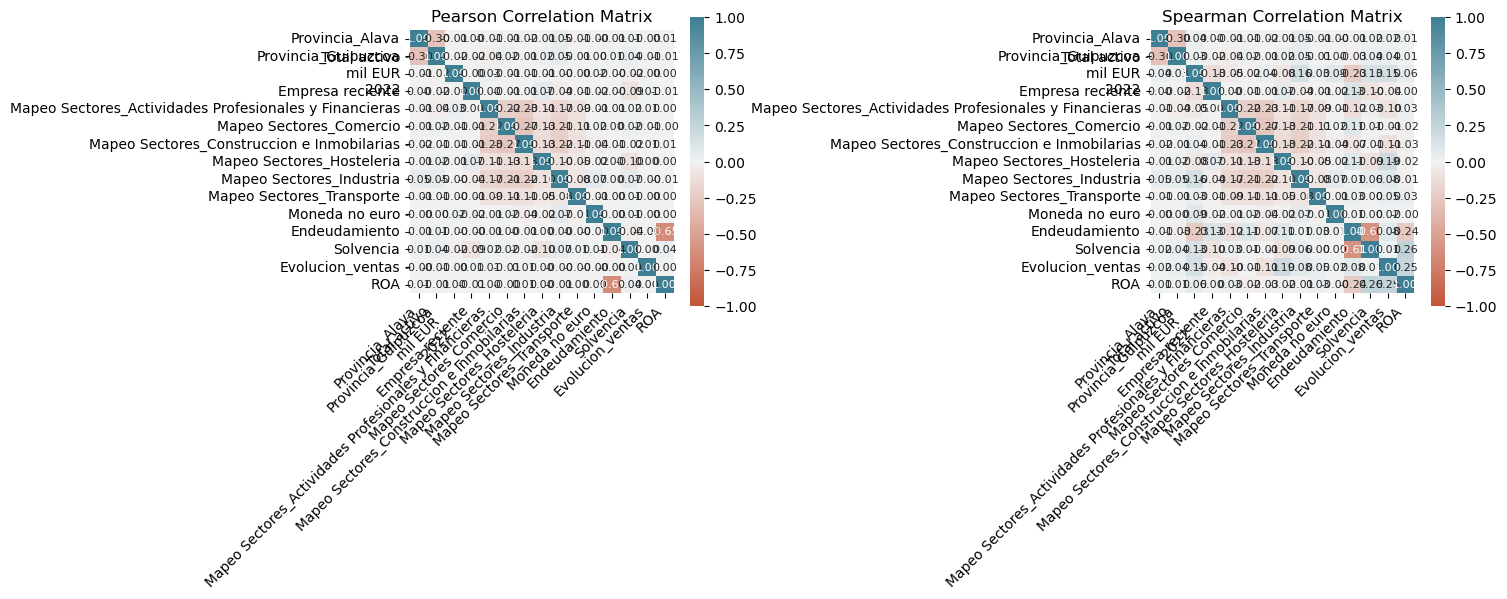

In [13]:
fig, ax =plt.subplots(1,2, figsize=(15,6))

sns.heatmap(corr_pearson, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax[0], annot=True, fmt=".2f", annot_kws={"size": 8})
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[0].set_yticklabels(ax[0].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[0].set_title("Pearson Correlation Matrix")

sns.heatmap(corr_spearman, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True, ax=ax[1], fmt=".2f", annot_kws={"size": 8})
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[1].set_yticklabels(ax[1].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[1].set_title("Spearman Correlation Matrix");

plt.tight_layout()

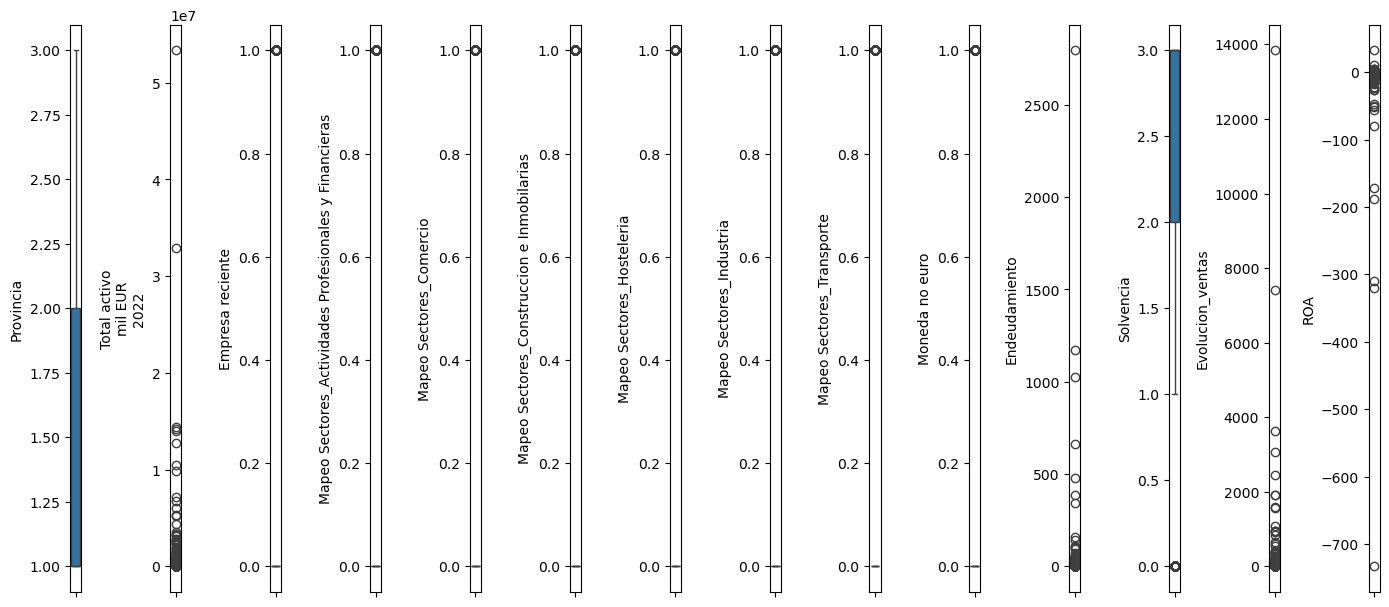

In [8]:
l = df_analisis.drop(["Código NIF"],axis = 1).columns.values
number_of_columns = len(l)
plt.figure(figsize=(number_of_columns,12))
for i in range(0,len(l)):
    plt.subplot(2,number_of_columns,i+1)
    sns.boxplot(df_analisis[l[i]])
    plt.ylabel(l[i])
    plt.tight_layout()

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import OPTICS,DBSCAN

In [63]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_analisis_sinind)

In [67]:
df_analisis_sinind.columns

Index(['Provincia_Alava', 'Provincia_Guipuzcoa', 'Total activo\nmil EUR\n2022',
       'Empresa reciente',
       'Mapeo Sectores_Actividades Profesionales y Financieras',
       'Mapeo Sectores_Comercio', 'Mapeo Sectores_Construccion e Inmobilarias',
       'Mapeo Sectores_Hosteleria', 'Mapeo Sectores_Industria',
       'Mapeo Sectores_Transporte', 'Moneda no euro', 'Endeudamiento',
       'Solvencia', 'Evolucion_ventas', 'ROA'],
      dtype='object')

In [64]:
pesos = np.array([1,1,3.5,2.5,2,2,2,2,2,2,2.5,3,3,3,3])
data_pesos = data_scaled*pesos

In [65]:
inertia = []
k = range(1, 20)
for n_clusters in k:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42, init = 'k-means++')
    kmeans.fit(data_pesos)
    inertia.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

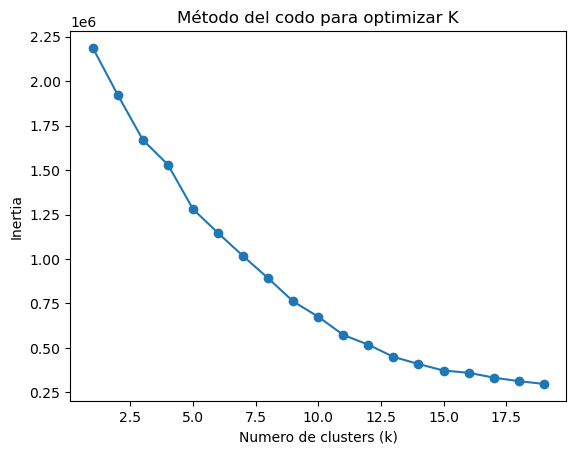

In [66]:
plt.plot(k, inertia, marker = 'o')
plt.title('Método del codo para optimizar K')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inertia')
plt.show

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
df_analisis_sinind.columns

Index(['Provincia_Alava', 'Provincia_Guipuzcoa', 'Total activo\nmil EUR\n2022',
       'Empresa reciente',
       'Mapeo Sectores_Actividades Profesionales y Financieras',
       'Mapeo Sectores_Comercio', 'Mapeo Sectores_Construccion e Inmobilarias',
       'Mapeo Sectores_Hosteleria', 'Mapeo Sectores_Industria',
       'Mapeo Sectores_Transporte', 'Moneda no euro', 'Endeudamiento',
       'Solvencia', 'Evolucion_ventas', 'ROA', 'Cluster'],
      dtype='object')

In [58]:
linkage_matrix = linkage(data_pesos, method = 'ward')

<function matplotlib.pyplot.show(close=None, block=None)>

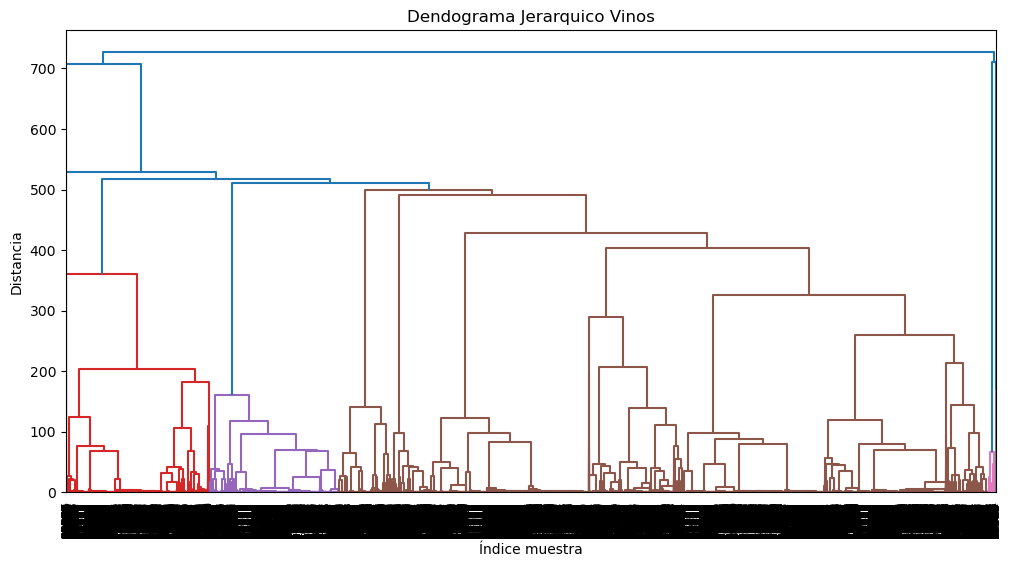

In [59]:
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix, labels=df_analisis_sinind.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendograma Jerarquico')
plt.ylabel('Distancia')
plt.show()

In [50]:
n_clusters = 11
model = AgglomerativeClustering(n_clusters = n_clusters, connectivity=None, linkage = 'ward', distance_threshold = None)
clusters = model.fit_predict(data_pesos)

df_analisis_sinind['Cluster'] = clusters

In [52]:
df_analisis_sinind.head()

,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Mapeo Sectores_Actividades Profesionales y Financieras,Mapeo Sectores_Comercio,Mapeo Sectores_Construccion e Inmobilarias,Mapeo Sectores_Hosteleria,Mapeo Sectores_Industria,Mapeo Sectores_Transporte,Moneda no euro,Endeudamiento,Solvencia,Evolucion_ventas,ROA,Cluster
0,False,False,3252348.0,False,False,False,False,False,False,False,False,0.538763,3,0.964045,0.192971,0
1,False,False,14448655.0,False,True,False,False,False,False,False,True,0.455249,1,0.972882,0.033079,7
2,False,False,7184141.0,False,False,True,False,False,False,False,False,0.831133,3,-0.125041,0.128516,0
3,False,False,835248.0,False,False,True,False,False,False,False,False,0.589296,3,0.248713,0.080703,0
4,False,False,53343000.0,False,True,False,False,False,False,False,False,0.406089,0,0.061806,0.053240,6


In [55]:
df_analisis_sinind.groupby('Cluster')["Solvencia"].value_counts()

Cluster  Solvencia
0        3            16250
         2             4560
         1              137
         0               13
1        0                4
         3                2
2        3              793
         0              476
         2              265
         1              151
3        3                1
         2                1
4        0             3502
         1             1753
         3                6
         2                2
5        3              131
         2               54
         0               17
         1               16
6        0                1
         1                1
7        0                3
         1                2
         2                1
8        3              721
         2              272
         0              135
         1               86
9        0                1
10       0                1
Name: count, dtype: int64

In [53]:
df_analisis_sinind["Cluster"].value_counts()

Cluster
0     20960
4      5263
2      1685
8      1214
5       218
7         6
1         6
6         2
3         2
10        1
9         1
Name: count, dtype: int64

In [ ]:
clust = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
